<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Technology_Timeline_Graphic_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is a technology timeline graphic related to electronics, compiled by Onri Jay Benally (2025).

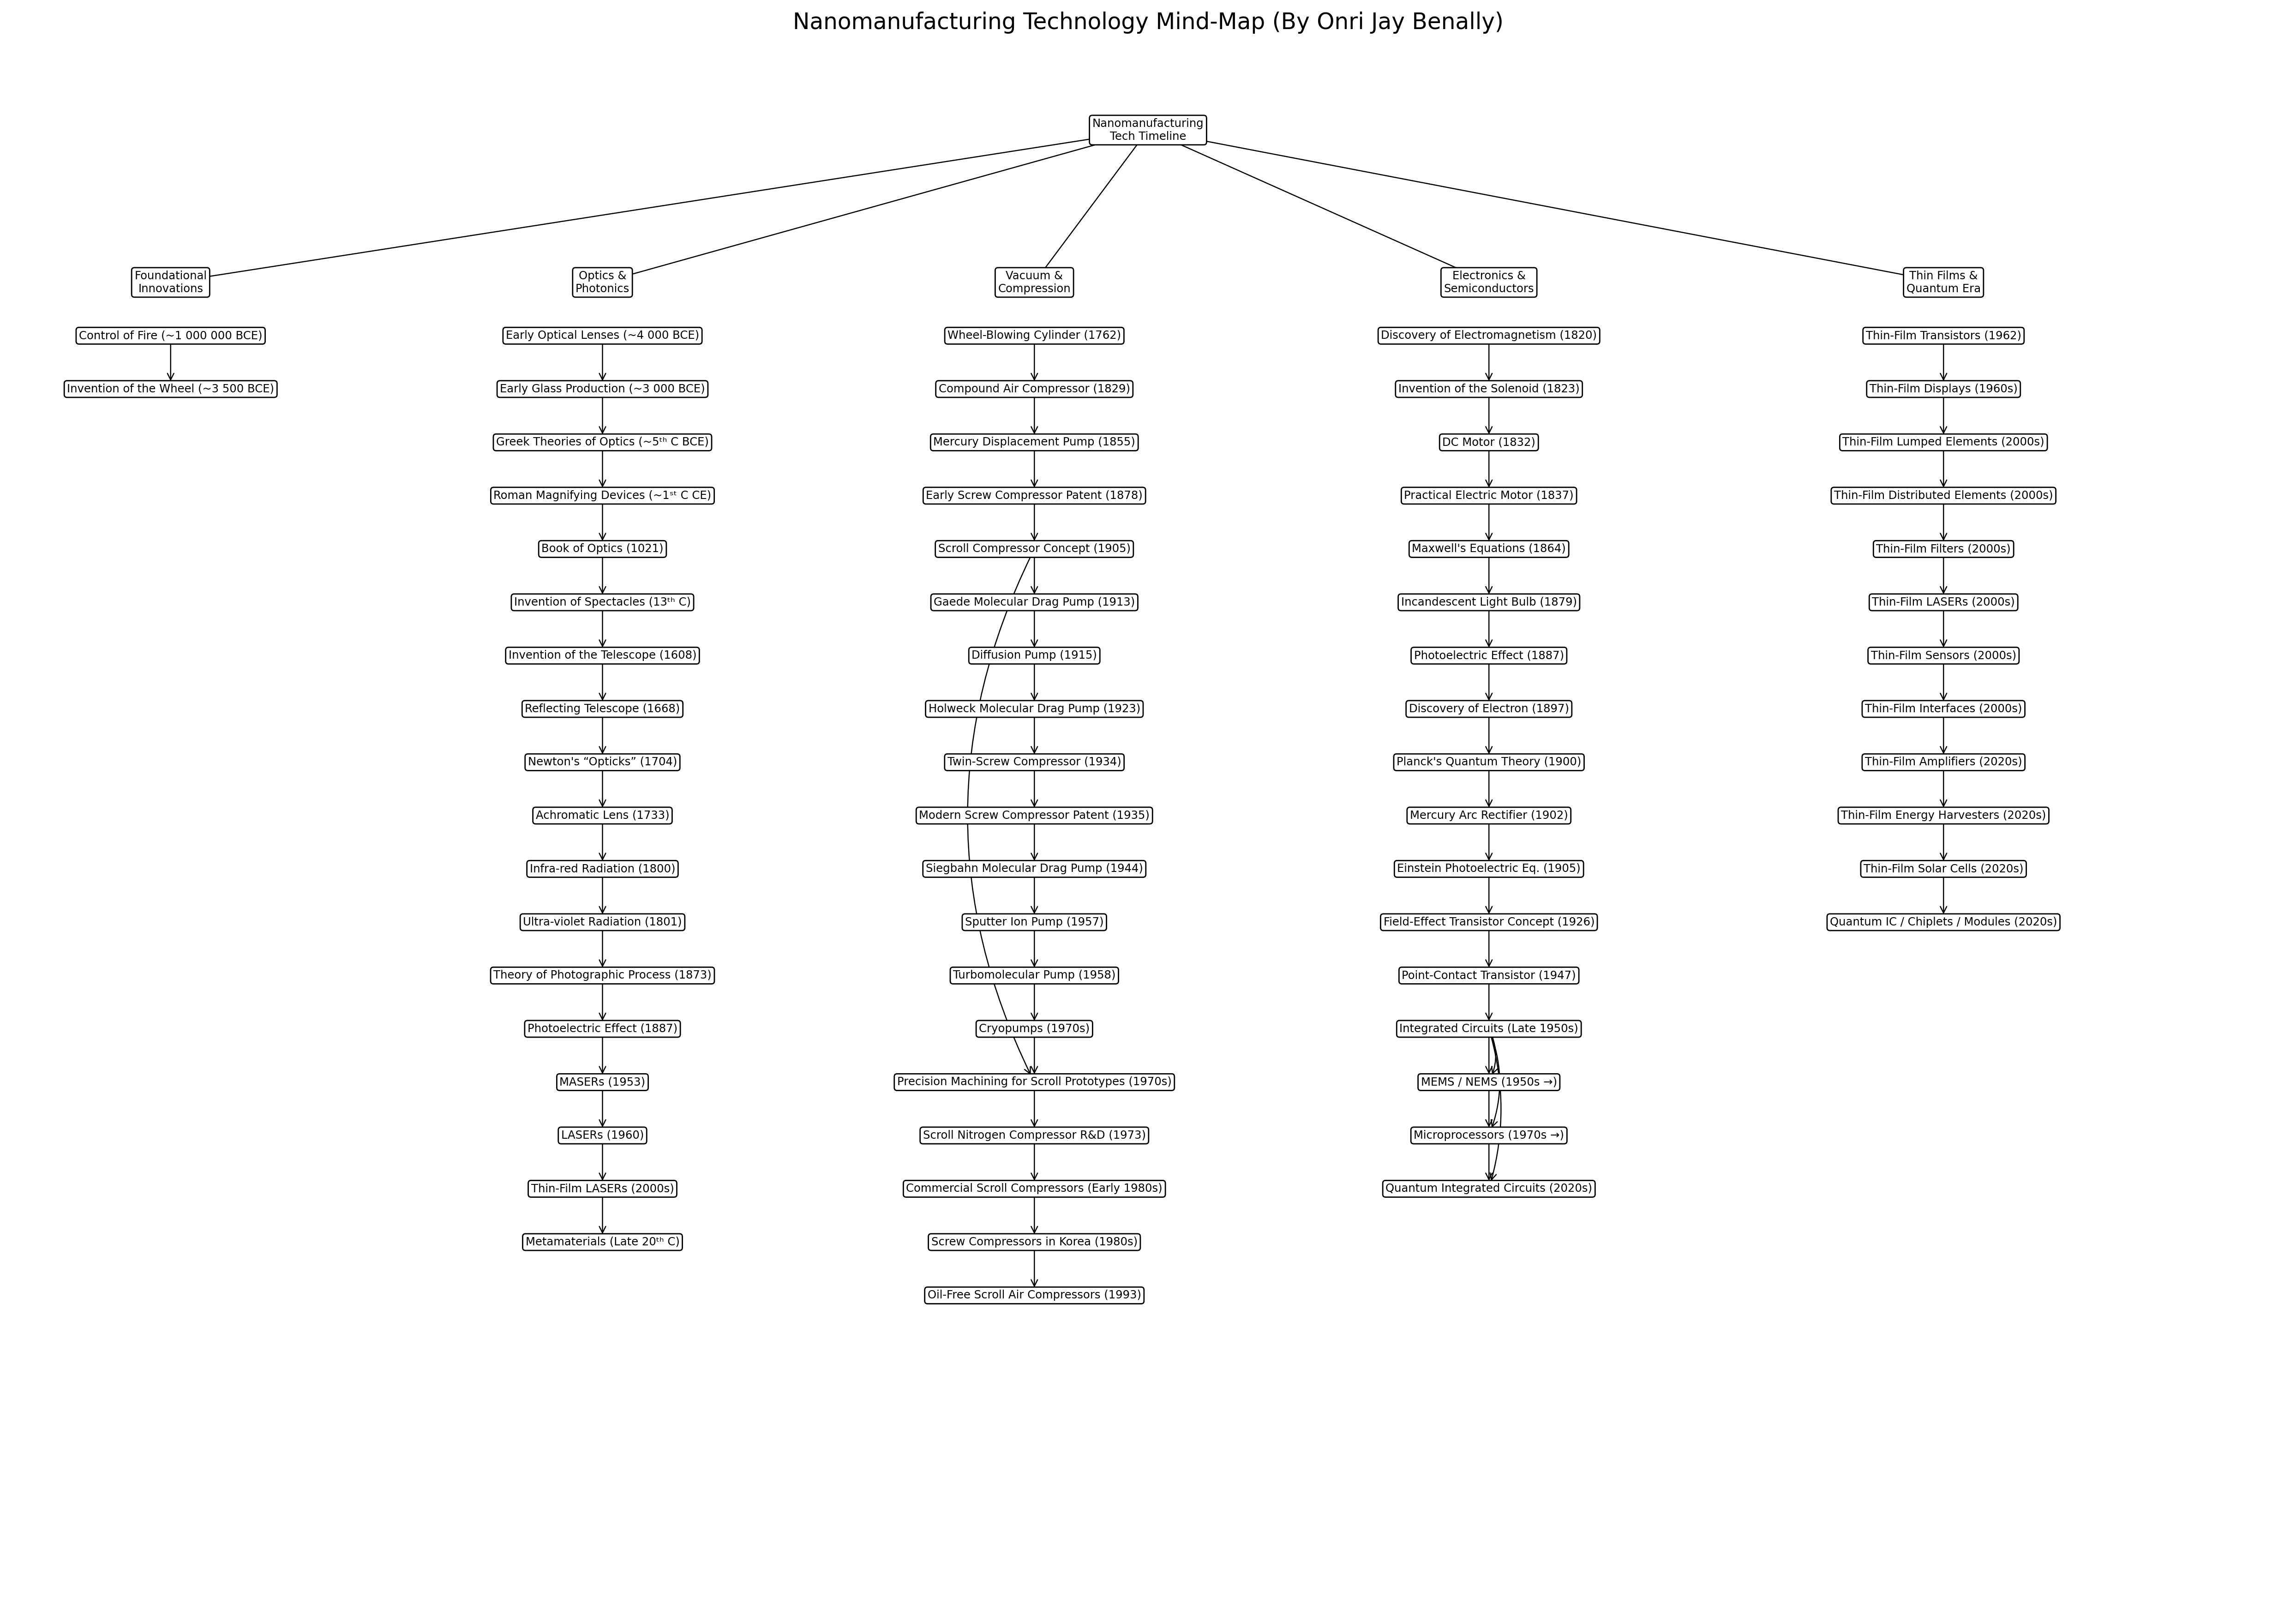

In [ ]:
# Nanomanufacturing Technology Mind-Map  – DPI = 250, arrows in back
import matplotlib.pyplot as plt

# ─── headers (label, x, y) ─────────────────────────────────────
headers = [
    ("Nanomanufacturing\nTech Timeline",       0.50, 0.96),
    ("Foundational\nInnovations",              0.07, 0.86),
    ("Optics &\nPhotonics",                    0.26, 0.86),
    ("Vacuum &\nCompression",                  0.45, 0.86),
    ("Electronics &\nSemiconductors",          0.65, 0.86),
    ("Thin Films &\nQuantum Era",              0.85, 0.86),
]
SPACING = 0.035

# ─── branch data (codes → lists) ───────────────────────────────
branches = {
    "Fd": ["Control of Fire (~1 000 000 BCE)", "Invention of the Wheel (~3 500 BCE)"],
    "Op": [
        "Early Optical Lenses (~4 000 BCE)", "Early Glass Production (~3 000 BCE)",
        "Greek Theories of Optics (~5ᵗʰ C BCE)", "Roman Magnifying Devices (~1ˢᵗ C CE)",
        "Book of Optics (1021)", "Invention of Spectacles (13ᵗʰ C)",
        "Invention of the Telescope (1608)", "Reflecting Telescope (1668)",
        "Newton's “Opticks” (1704)", "Achromatic Lens (1733)",
        "Infra-red Radiation (1800)", "Ultra-violet Radiation (1801)",
        "Theory of Photographic Process (1873)", "Photoelectric Effect (1887)",
        "MASERs (1953)", "LASERs (1960)", "Thin-Film LASERs (2000s)",
        "Metamaterials (Late 20ᵗʰ C)",
    ],
    "Va": [
        "Wheel-Blowing Cylinder (1762)", "Compound Air Compressor (1829)",
        "Mercury Displacement Pump (1855)", "Early Screw Compressor Patent (1878)",
        "Scroll Compressor Concept (1905)", "Gaede Molecular Drag Pump (1913)",
        "Diffusion Pump (1915)", "Holweck Molecular Drag Pump (1923)",
        "Twin-Screw Compressor (1934)", "Modern Screw Compressor Patent (1935)",
        "Siegbahn Molecular Drag Pump (1944)", "Sputter Ion Pump (1957)",
        "Turbomolecular Pump (1958)", "Cryopumps (1970s)",
        "Precision Machining for Scroll Prototypes (1970s)",
        "Scroll Nitrogen Compressor R&D (1973)",
        "Commercial Scroll Compressors (Early 1980s)",
        "Screw Compressors in Korea (1980s)",
        "Oil-Free Scroll Air Compressors (1993)",
    ],
    "El": [
        "Discovery of Electromagnetism (1820)", "Invention of the Solenoid (1823)",
        "DC Motor (1832)", "Practical Electric Motor (1837)",
        "Maxwell's Equations (1864)", "Incandescent Light Bulb (1879)",
        "Photoelectric Effect (1887)", "Discovery of Electron (1897)",
        "Planck's Quantum Theory (1900)", "Mercury Arc Rectifier (1902)",
        "Einstein Photoelectric Eq. (1905)", "Field-Effect Transistor Concept (1926)",
        "Point-Contact Transistor (1947)", "Integrated Circuits (Late 1950s)",
        "MEMS / NEMS (1950s →)", "Microprocessors (1970s →)",
        "Quantum Integrated Circuits (2020s)",
    ],
    "TF": [
        "Thin-Film Transistors (1962)", "Thin-Film Displays (1960s)",
        "Thin-Film Lumped Elements (2000s)", "Thin-Film Distributed Elements (2000s)",
        "Thin-Film Filters (2000s)", "Thin-Film LASERs (2000s)",
        "Thin-Film Sensors (2000s)", "Thin-Film Interfaces (2000s)",
        "Thin-Film Amplifiers (2020s)", "Thin-Film Energy Harvesters (2020s)",
        "Thin-Film Solar Cells (2020s)", "Quantum IC / Chiplets / Modules (2020s)",
    ],
}

# ─── coordinate maps ───────────────────────────────────────────
coords, labels, order = {}, {}, []
for lbl, x, y in headers:
    uid = f"H|{lbl}"
    coords[uid], labels[uid] = (x, y), lbl
    order.append(uid)

# branch header lookup
header_xy = {code: (x, y) for (lbl, x, y), code in zip(headers[1:], branches.keys())}

def add_node(bc, text, y):
    uid = f"{bc}|{text}"
    coords[uid], labels[uid] = (header_xy[bc][0], y), text
    order.append(uid); return uid

for bc, lst in branches.items():
    _, header_y = header_xy[bc]; y = header_y - SPACING
    for item in lst: add_node(bc, item, y); y -= SPACING

# ─── arrow helper (z-order = 1) ────────────────────────────────
def arrow(src, dst, curve=0.0):
    sx, sy = coords[src]; dx, dy = coords[dst]
    props = dict(arrowstyle="->", lw=0.7, shrinkA=5, shrinkB=5, zorder=1)
    if curve: props["connectionstyle"] = f"arc3,rad={curve}"
    ax.annotate("", xy=(dx, dy), xytext=(sx, sy), arrowprops=props)

# ─── plot ──────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(20, 14), dpi=250)  # 250 DPI right here
ax.axis("off")

root = "H|Nanomanufacturing\nTech Timeline"
for hdr_uid in [f"H|{h[0]}" for h in headers[1:]]: arrow(root, hdr_uid)
for bc, lst in branches.items():
    ids = [f"{bc}|{t}" for t in lst]
    for a, b in zip(ids[:-1], ids[1:]): arrow(a, b)

# curved cross-links (trimmed)
arrow("El|Integrated Circuits (Late 1950s)", "El|MEMS / NEMS (1950s →)",   curve=-0.25)
arrow("El|Integrated Circuits (Late 1950s)", "El|Microprocessors (1970s →)",curve=-0.20)
arrow("El|Integrated Circuits (Late 1950s)", "El|Quantum Integrated Circuits (2020s)", curve=-0.15)
arrow("Va|Scroll Compressor Concept (1905)", "Va|Precision Machining for Scroll Prototypes (1970s)", curve=0.25)

# draw node boxes on top
for uid in order:
    x, y = coords[uid]
    ax.text(x, y, labels[uid], ha="center", va="center", fontsize=7,
            bbox=dict(boxstyle="round,pad=0.25", ec="black", lw=0.8, fc="white"),
            zorder=3)

plt.title("Nanomanufacturing Technology Mind-Map (By Onri Jay Benally)", fontsize=14, pad=25)
plt.tight_layout(); plt.show()

# high-resolution SVG + 250 DPI PNG
fig.savefig("nanomanufacturing_timeline.svg", format="svg")
fig.savefig("nanomanufacturing_timeline.png", dpi=250)  # optional PNG

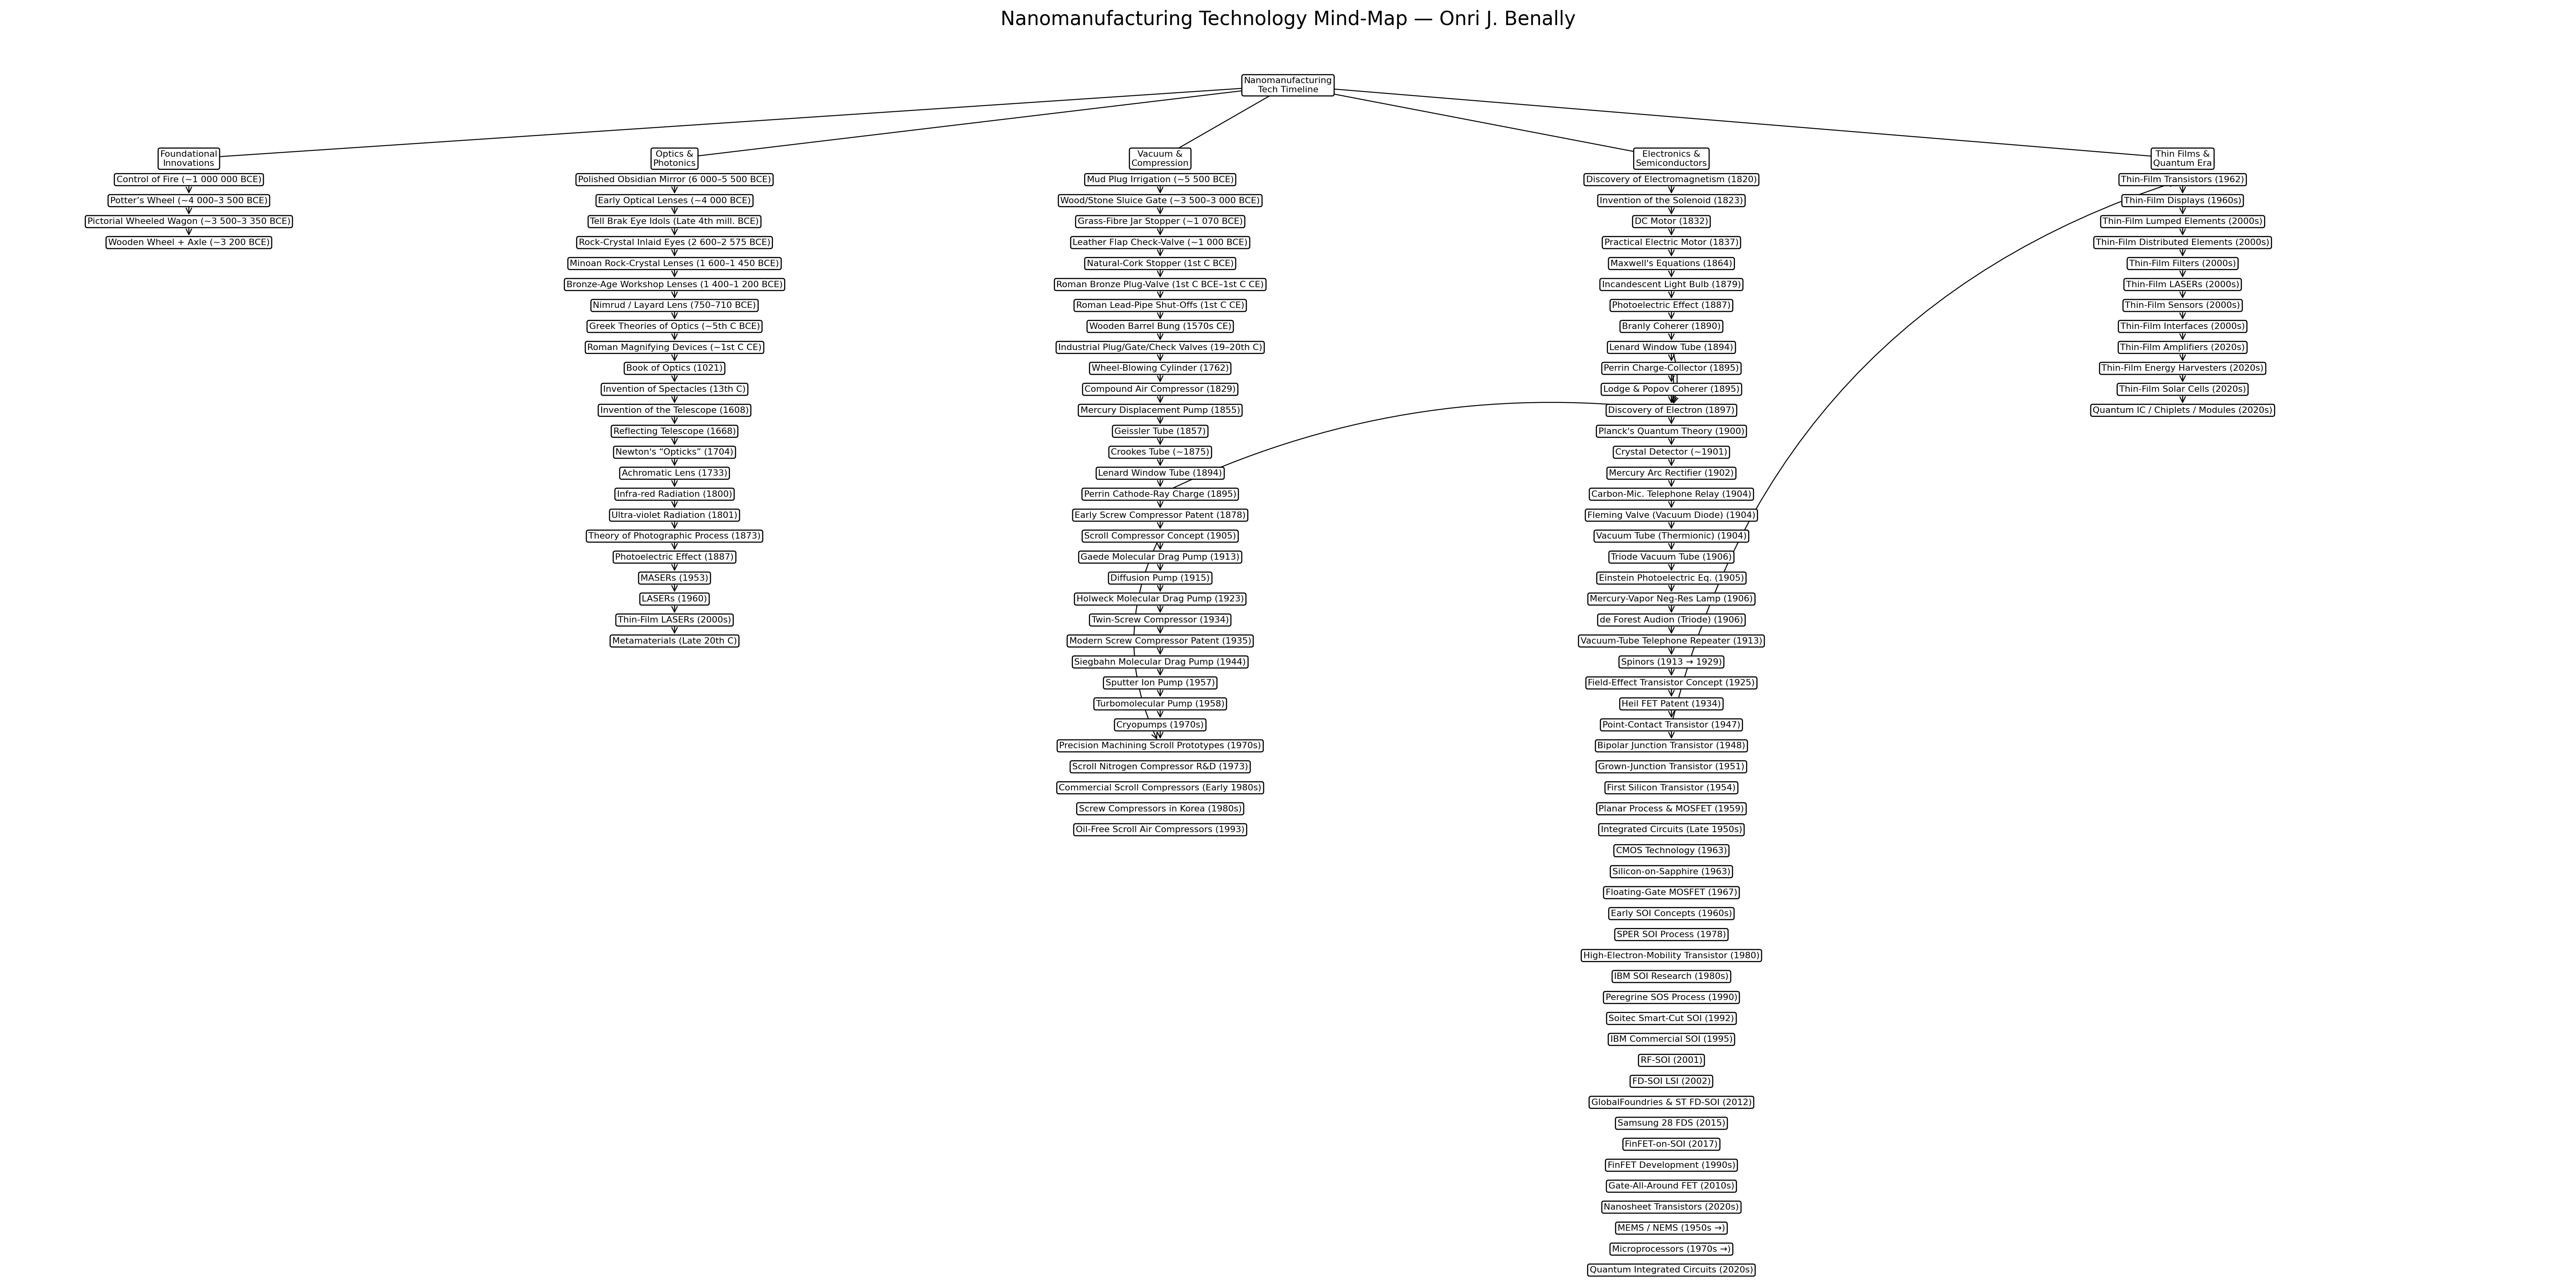

In [ ]:
# Nanomanufacturing Technology Mind-Map  ·  July 2025
# 250 DPI  ·  sequential arrows + cross-links
# Forced curved arrow: Turbomolecular Pump (1958) ➜ HEMT (1980)
import matplotlib.pyplot as plt

# ── column headers ────────────────────────────────────────────
headers = [
    ("Nanomanufacturing\nTech Timeline", 0.50, 0.965),
    ("Foundational\nInnovations",        0.07, 0.86),
    ("Optics &\nPhotonics",              0.26, 0.86),
    ("Vacuum &\nCompression",            0.45, 0.86),
    ("Electronics &\nSemiconductors",    0.65, 0.86),
    ("Thin Films &\nQuantum Era",        0.85, 0.86),
]
SPACING = 0.03   # vertical spacing

# ── branch data  (no “Basic Mechanical …” entry) ─────────────
branches = {

    "Fd": [
        "Control of Fire (~1 000 000 BCE)",
        "Potter’s Wheel (~4 000–3 500 BCE)",
        "Pictorial Wheeled Wagon (~3 500–3 350 BCE)",
        "Wooden Wheel + Axle (~3 200 BCE)",
    ],

    "Op": [
        "Polished Obsidian Mirror (6 000–5 500 BCE)",
        "Early Optical Lenses (~4 000 BCE)",
        "Tell Brak Eye Idols (Late 4th mill. BCE)",
        "Rock-Crystal Inlaid Eyes (2 600–2 575 BCE)",
        "Minoan Rock-Crystal Lenses (1 600–1 450 BCE)",
        "Bronze-Age Workshop Lenses (1 400–1 200 BCE)",
        "Nimrud / Layard Lens (750–710 BCE)",
        "Greek Theories of Optics (~5th C BCE)",
        "Roman Magnifying Devices (~1st C CE)",
        "Book of Optics (1021)",
        "Invention of Spectacles (13th C)",
        "Invention of the Telescope (1608)",
        "Reflecting Telescope (1668)",
        "Newton's “Opticks” (1704)",
        "Achromatic Lens (1733)",
        "Infra-red Radiation (1800)",
        "Ultra-violet Radiation (1801)",
        "Theory of Photographic Process (1873)",
        "Photoelectric Effect (1887)",
        "MASERs (1953)",
        "LASERs (1960)",
        "Thin-Film LASERs (2000s)",
        "Metamaterials (Late 20th C)",
    ],

    "Va": [
        "Mud Plug Irrigation (~5 500 BCE)",
        "Wood/Stone Sluice Gate (~3 500–3 000 BCE)",
        "Grass-Fibre Jar Stopper (~1 070 BCE)",
        "Leather Flap Check-Valve (~1 000 BCE)",
        "Natural-Cork Stopper (1st C BCE)",
        "Roman Bronze Plug-Valve (1st C BCE–1st C CE)",
        "Roman Lead-Pipe Shut-Offs (1st C CE)",
        "Wooden Barrel Bung (1570s CE)",
        "Industrial Plug/Gate/Check Valves (19–20th C)",
        "Wheel-Blowing Cylinder (1762)",
        "Compound Air Compressor (1829)",
        "Mercury Displacement Pump (1855)",
        "Geissler Tube (1857)",
        "Crookes Tube (~1875)",
        "Lenard Window Tube (1894)",
        "Perrin Cathode-Ray Charge (1895)",
        "Early Screw Compressor Patent (1878)",
        "Scroll Compressor Concept (1905)",
        "Gaede Molecular Drag Pump (1913)",
        "Diffusion Pump (1915)",
        "Holweck Molecular Drag Pump (1923)",
        "Twin-Screw Compressor (1934)",
        "Modern Screw Compressor Patent (1935)",
        "Siegbahn Molecular Drag Pump (1944)",
        "Sputter Ion Pump (1957)",
        "Turbomolecular Pump (1958)",
        "Cryopumps (1970s)",
        "Precision Machining Scroll Prototypes (1970s)",
        "Scroll Nitrogen Compressor R&D (1973)",
        "Commercial Scroll Compressors (Early 1980s)",
        "Screw Compressors in Korea (1980s)",
        "Oil-Free Scroll Air Compressors (1993)",
    ],

    "El": [
        "Discovery of Electromagnetism (1820)", "Invention of the Solenoid (1823)",
        "DC Motor (1832)", "Practical Electric Motor (1837)",
        "Maxwell's Equations (1864)", "Incandescent Light Bulb (1879)",
        "Photoelectric Effect (1887)", "Branly Coherer (1890)",
        "Lenard Window Tube (1894)", "Perrin Charge-Collector (1895)",
        "Lodge & Popov Coherer (1895)", "Discovery of Electron (1897)",
        "Planck's Quantum Theory (1900)", "Crystal Detector (~1901)",
        "Mercury Arc Rectifier (1902)", "Carbon-Mic. Telephone Relay (1904)",
        "Fleming Valve (Vacuum Diode) (1904)", "Vacuum Tube (Thermionic) (1904)",
        "Triode Vacuum Tube (1906)", "Einstein Photoelectric Eq. (1905)",
        "Mercury-Vapor Neg-Res Lamp (1906)", "de Forest Audion (Triode) (1906)",
        "Vacuum-Tube Telephone Repeater (1913)", "Spinors (1913 → 1929)",
        "Field-Effect Transistor Concept (1925)", "Heil FET Patent (1934)",
        "Point-Contact Transistor (1947)", "Bipolar Junction Transistor (1948)",
        "Grown-Junction Transistor (1951)", "First Silicon Transistor (1954)",
        "Planar Process & MOSFET (1959)", "Integrated Circuits (Late 1950s)",
        "CMOS Technology (1963)", "Silicon-on-Sapphire (1963)",
        "Floating-Gate MOSFET (1967)", "Early SOI Concepts (1960s)",
        "SPER SOI Process (1978)", "High-Electron-Mobility Transistor (1980)",
        "IBM SOI Research (1980s)", "Peregrine SOS Process (1990)",
        "Soitec Smart-Cut SOI (1992)", "IBM Commercial SOI (1995)",
        "RF-SOI (2001)", "FD-SOI LSI (2002)",
        "GlobalFoundries & ST FD-SOI (2012)", "Samsung 28 FDS (2015)",
        "FinFET-on-SOI (2017)", "FinFET Development (1990s)",
        "Gate-All-Around FET (2010s)", "Nanosheet Transistors (2020s)",
        "MEMS / NEMS (1950s →)", "Microprocessors (1970s →)",
        "Quantum Integrated Circuits (2020s)",
    ],

    "TF": [
        "Thin-Film Transistors (1962)", "Thin-Film Displays (1960s)",
        "Thin-Film Lumped Elements (2000s)", "Thin-Film Distributed Elements (2000s)",
        "Thin-Film Filters (2000s)", "Thin-Film LASERs (2000s)",
        "Thin-Film Sensors (2000s)", "Thin-Film Interfaces (2000s)",
        "Thin-Film Amplifiers (2020s)", "Thin-Film Energy Harvesters (2020s)",
        "Thin-Film Solar Cells (2020s)", "Quantum IC / Chiplets / Modules (2020s)",
    ],
}

# ── build coordinate map --------------------------------------
coords, labels, order = {}, {}, []
for txt, x, y in headers:
    uid = f"H|{txt}"; coords[uid] = (x, y); labels[uid] = txt; order.append(uid)

header_xy = {c: (x, y) for (txt, x, y), c in zip(headers[1:], branches)}

def add_node(col, text, y):
    uid = f"{col}|{text}"
    coords[uid] = (header_xy[col][0], y); labels[uid] = text; order.append(uid)

for col, items in branches.items():
    y = header_xy[col][1] - SPACING
    for t in items: add_node(col, t, y); y -= SPACING

# ── arrow helper ----------------------------------------------
def arrow(src, dst, curve=0.0, z=1, lw=0.7):
    sx, sy = coords[src]; dx, dy = coords[dst]
    props = dict(arrowstyle="->", lw=lw, shrinkA=5, shrinkB=5, zorder=z)
    if curve: props["connectionstyle"] = f"arc3,rad={curve}"
    ax.annotate("", xy=(dx, dy), xytext=(sx, sy), arrowprops=props)

# ── draw figure -----------------------------------------------
fig, ax = plt.subplots(figsize=(26, 18), dpi=250); ax.axis("off")

# root → headers
root = "H|Nanomanufacturing\nTech Timeline"
for txt, *_ in headers[1:]:
    arrow(root, f"H|{txt}")

# sequential arrows
for col, items in branches.items():
    ids = [f"{col}|{t}" for t in items]
    for a, b in zip(ids[:-1], ids[1:]): arrow(a, b)

# selected cross-branch arrows
arrow("Va|Perrin Cathode-Ray Charge (1895)", "El|Discovery of Electron (1897)", curve=-0.15)
arrow("El|Lenard Window Tube (1894)",        "El|Discovery of Electron (1897)", curve=-0.18)
arrow("El|Perrin Charge-Collector (1895)",   "El|Discovery of Electron (1897)", curve=-0.12)
arrow("El|Integrated Circuits (Late 1950s)", "El|MEMS / NEMS (1950s →)",        curve=-0.25)
arrow("El|Integrated Circuits (Late 1950s)", "El|Microprocessors (1970s →)",     curve=-0.20)
arrow("El|Integrated Circuits (Late 1950s)", "El|Quantum Integrated Circuits (2020s)", curve=-0.15)
arrow("Va|Scroll Compressor Concept (1905)", "Va|Precision Machining Scroll Prototypes (1970s)", curve=0.25)
arrow("El|Point-Contact Transistor (1947)",  "El|Integrated Circuits (Late 1950s)",          curve=-0.22)
arrow("El|Point-Contact Transistor (1947)",  "TF|Thin-Film Transistors (1962)",               curve=-0.28)

# forced Turbomolecular Pump ➜ HEMT arrow
arrow("Va|Turbomolecular Pump (1958)",
      "El|High-Electron-Mobility Transistor (1980)",   # ← copy/paste this!
      curve=-0.55, z=2, lw=0.9)


# ── node boxes (top layer) ------------------------------------
for uid in order:
    x, y = coords[uid]
    ax.text(x, y, labels[uid], ha="center", va="center", fontsize=6.4,
            bbox=dict(boxstyle="round,pad=0.23", ec="black", lw=0.8, fc="white"),
            zorder=3)

plt.title("Nanomanufacturing Technology Mind-Map — Onri J. Benally", fontsize=14, pad=26)
plt.tight_layout(); plt.show()

# high-resolution exports
fig.savefig("nanomanufacturing_timeline.svg", format="svg")
fig.savefig("nanomanufacturing_timeline.png", dpi=250)